In [1]:
import os
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import pandas as pd


*Exploratory Data Analysis of Titanic Dataset*

In [2]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [3]:
import numpy as np
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


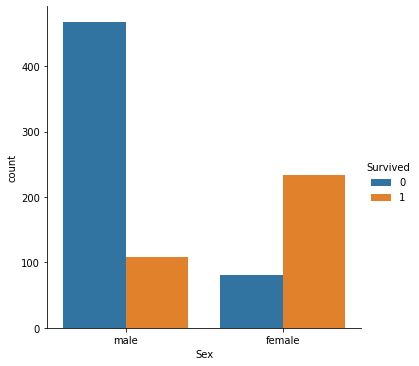

In [7]:
sns.catplot(x ="Sex", hue ="Survived", 
kind ="count", data = train_df)
plt.show()

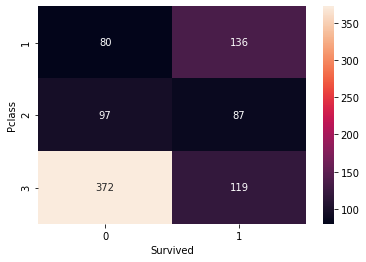

In [8]:
# Group the dataset by Pclass and Survived and then unstack them
group = train_df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


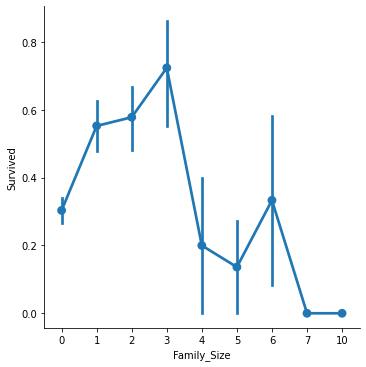

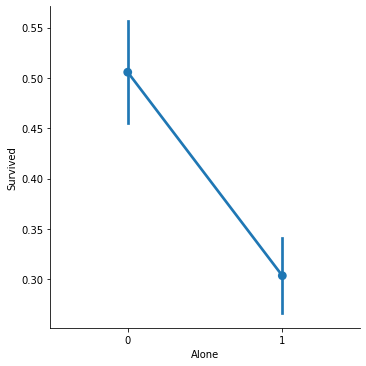

In [9]:
# Adding a column Family_Size
train_df['Family_Size'] = 0
train_df['Family_Size'] = train_df['Parch']+train_df['SibSp']

# Adding a column Alone
train_df['Alone'] = 0
train_df.loc[train_df.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = train_df)

# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = train_df)
plt.show()

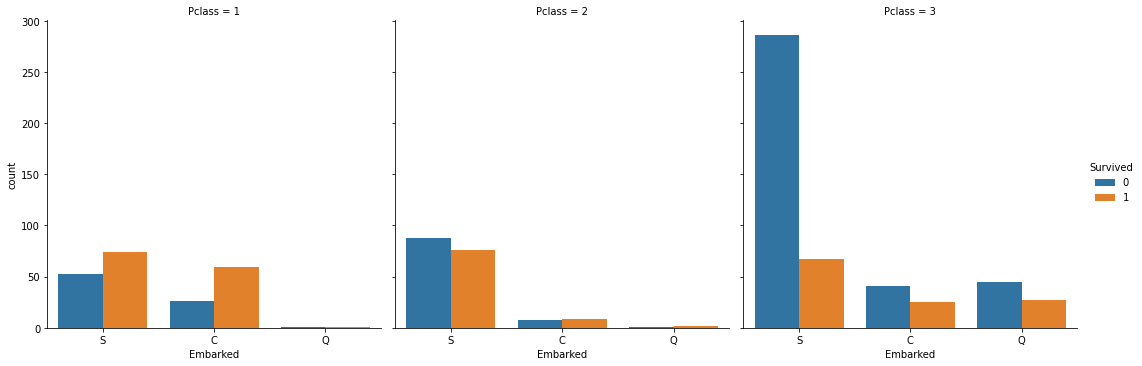

In [10]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train_df)


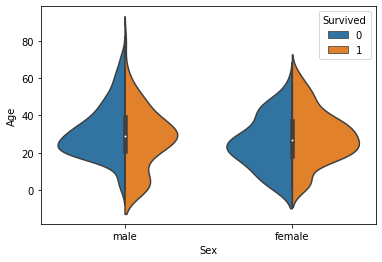

In [11]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train_df, split = True)


*Data* *Preprocessing*

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
Alone            0
dtype: int64

In [13]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
#define a function that replaces the cabin code with the deck character
def search_substring(big_string, substring_list):
    for substring in substring_list:
        if substring in big_string:
            return substring
    return substring_list[-1]

In [15]:
def get_title(string):
    import re
    regex = re.compile(r'Mr|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mrs|Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.IGNORECASE)
    results = regex.search(string)
    if results != None:
        return(results.group().lower())
    else:
        return(str(np.nan))

In [16]:
# dictionary to map to generate the new feature vector
title_dictionary = {
    "capt":"Officer", 
    "col":"Officer", 
    "major":"Officer", 
    "dr":"Officer",
    "jonkheer":"Royalty",
    "rev":"Officer",
    "countess":"Royalty",
    "dona":"Royalty",
    "lady":"Royalty",
    "don":"Royalty",
    "mr":"Mr",
    "mme":"Mrs",
    "ms":"Mrs",
    "mrs":"Mrs",
    "miss":"Miss",
    "mlle":"Miss",
    "master":"Master",
    "nan":"Mr"
}


In [17]:
train_df['Deck'] = train_df['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
test_df['Deck'] = test_df['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
# delete the Cabin feature
train_df.drop('Cabin', 1, inplace=True)
test_df.drop('Cabin', 1, inplace=True)

train_df['Title'] = train_df['Name'].apply(get_title)
test_df['Title'] = test_df['Name'].apply(get_title)
train_df['Title'] = train_df['Title'].map(title_dictionary)
test_df['Title'] = test_df['Title'].map(title_dictionary)
# delete the Name feature
train_df.drop('Name', 1, inplace=True)
test_df.drop('Name', 1, inplace=True)

In [18]:
train_df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Alone,Deck,Title
886,887,0,2,male,27.0,0,0,211536,13.00,S,0,1,Unknown,Officer
887,888,1,1,female,19.0,0,0,112053,30.00,S,0,1,B,Miss
888,889,0,3,female,NaN,1,2,W./C. 6607,23.45,S,3,0,Unknown,Miss
889,890,1,1,male,26.0,0,0,111369,30.00,C,0,1,C,Mr
890,891,0,3,male,32.0,0,0,370376,7.75,Q,0,1,Unknown,Mr


In [19]:
#dropping ticket column
train_df.drop('Ticket', 1, inplace=True)
test_df.drop('Ticket', 1, inplace=True)

In [20]:
means_title = train_df.groupby('Title')['Age'].mean()

In [21]:
title_list = ['Mr','Miss','Mrs','Master', 'Royalty', 'Officer']
def age_nan_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title #extract indices of samples with same title
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title]) # replace nan values for mean
        

age_nan_replace(means_title, train_df, title_list)
age_nan_replace(means_title, test_df, title_list)

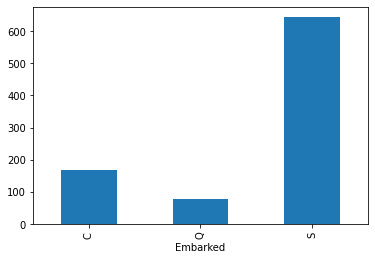

In [22]:
train_df.groupby('Embarked').size().plot(kind='bar')

In [23]:
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S', inplace=True)
#fill the fare column in the test set
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone,Deck,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,Unknown,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,C,Mr
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,Unknown,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,C,Mr
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,Unknown,Mr


In [25]:
from sklearn.preprocessing import StandardScaler

numericals_list = ['Age','Fare']
for column in numericals_list:
    sc = StandardScaler(with_mean=True, with_std=True)
#    print(training_set[column].size)
#    print(test_set[column].size)
    sc.fit(train_df[column].values.reshape(-1,1))
    train_df[column] = sc.transform(train_df[column].values.reshape(-1,1))
    test_df[column] = sc.transform(test_df[column].values.reshape(-1,1))

In [26]:
from sklearn.preprocessing import LabelEncoder
categorical_classes_list = ['Sex','Embarked','Deck', 'Title'] #Pclass is already encoded
#encode features that are cateorical classes
encoding_list = []
for column in categorical_classes_list:
    le = LabelEncoder()
    le.fit(train_df[column])
    encoding_list.append(train_df[column].unique())
    encoding_list.append(list(le.transform(train_df[column].unique())))
    train_df[column] = le.transform(train_df[column])
    test_df[column] = le.transform(test_df[column])

In [27]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone,Deck,Title
0,1,0,3,1,-0.587428,1,0,-0.502445,2,1,0,8,2
1,2,1,1,0,0.617618,1,0,0.786845,0,1,0,2,2
2,3,1,3,0,-0.286167,0,0,-0.488854,2,0,1,8,1
3,4,1,1,0,0.391672,1,0,0.420730,2,1,0,2,2
4,5,0,3,1,0.391672,0,0,-0.486337,2,0,1,8,2


In [28]:
train_df = pd.get_dummies(train_df, columns=['Embarked','Pclass','Title', 'Deck'])
test_df = pd.get_dummies(test_df, columns=['Embarked','Pclass','Title', 'Deck'])

In [29]:
train_df, test_df = train_df.align(test_df, axis=1)
test_df.drop('Survived', axis=1, inplace=True)
test_df.fillna(0, axis=1, inplace=True)

splitting the data 

In [30]:
from sklearn.model_selection import train_test_split

predictors = train_df.drop(['Survived', 'PassengerId'], axis=1)
target = train_df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

models comparision


In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

83.76


In [33]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

75.13


In [34]:
# Support Vector Machines
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.23


In [35]:
# Linear SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

82.74


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)


81.22


In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.23


In [38]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

78.68


In [39]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

80.71


In [40]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

85.79


In [41]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Gradient Boosting Classifier,85.79
2,Logistic Regression,83.76
5,Linear SVC,82.74
0,Support Vector Machines,82.23
3,Random Forest,82.23
6,Decision Tree,81.22
7,Stochastic Gradient Descent,80.71
1,KNN,78.68
4,Naive Bayes,75.13


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

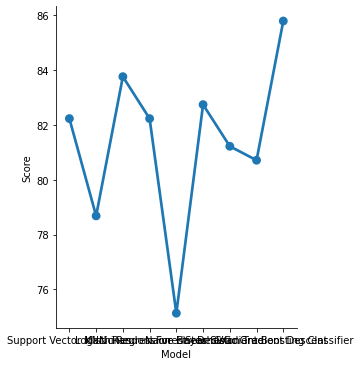

In [42]:
plt.figure(figsize = (10,10))
sns.factorplot(x = 'Model', y = 'Score', data = models)
plt.show()

In [44]:
#set ids as PassengerId and predict survival 
ids = test_df['PassengerId']
predictions = gbk.predict(test_df.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('/content/gender_submission.csv', index=False)